# Image orientation classification using ResNet50 model
* create-->fit-->validate(test dataset)-->estimate(true data)-->describe-->save results

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd

from src.models.imageorientation import OrientationEstimatorResnet50


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:

# initialize the estimator class by model prefix 
oer = OrientationEstimatorResnet50(model_name="resnet50_1")

# initialize trainig/validation data and check
train_ds, val_ds = oer.prepareTrainValidData()
oer.checkTrainValDataStructure()

# compile model 
model = oer.getCompiledModel()


Found 24056 files belonging to 4 classes.
Using 19245 files for training.
Found 24056 files belonging to 4 classes.
Using 4811 files for validation.
Number of batches in train_ds: 301
Number of batches in val_ds: 76
encoded label samples:  [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
images.shape:  (64, 224, 224, 3)
model has been compiled successfully


In [ ]:
# train & store model and atributes
history = oer.train(target_val_acc=.98, epochs=5)
oer.storeTrainedModel()

orientation_classifier_resnet50_1.keras param_set_resnet50_1.json training_history_resnet50_1.json stored to  C:\Users\User\DataScience\area51\models\resnet\resnet50_1


model accuracy & loss for: resnet50_1
{'accuracy': [0.9997920989990234],
 'learning_rate': [0.0010000000474974513],
 'loss': [0.0065767536871135235],
 'val_accuracy': [0.9991682171821594],
 'val_loss': [0.06549718976020813]}


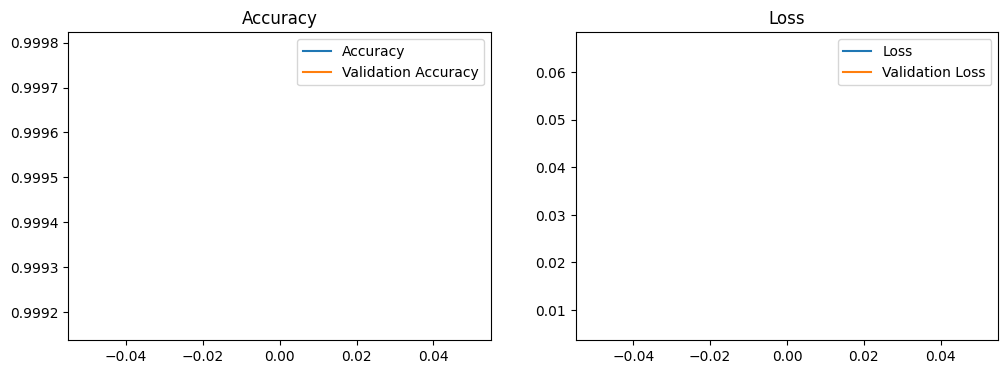

image_dataset_from_directory parameters for: resnet50_1
{'batch_size': 64,
 'color_mode': 'rgb',
 'directory': 'C:\\Users\\User\\DataScience\\area51\\data_224x224\\train_val_224x224',
 'image_size': [224, 224],
 'label_mode': 'categorical',
 'labels': 'inferred',
 'seed': 1,
 'shuffle': True,
 'validation_split': 0.2}


In [ ]:
# load stored model & atributes
model = oer.loadTrainedModel(include=["history", "param_set"])
# show model metrics
oer.plotModelMetrics(include=["history", "param_set",])

In [ ]:
# --> use this scenario to estimate your data from scratch

oer = OrientationEstimatorResnet50(model_name="resnet50_1")
oer.loadTrainedModel()
df_estimated = oer.estimateImageOrientation(dataset="test", save_to_csv=True) # estimate image orientation for specified dataset

model loaded from C:\Users\User\DataScience\area51\models\resnet\resnet50_1\orientation_classifier_resnet50_1.keras
model train history loaded from C:\Users\User\DataScience\area51\models\resnet\resnet50_1\training_history_resnet50_1.json
parameter set for image_dataset_from_directory loaded from C:\Users\User\DataScience\area51\models\resnet\resnet50_1\param_set_resnet50_1.json
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━

<string>:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


estimated results loaded from:  estimated_orientation_resnet50_1_test.csv

total rotated found: 52

     Disease       Orientation  Count
0  test_data           correct     12
1  test_data       rotated_180     14
2  test_data        rotated_90     13
3  test_data  rotated_minus_90     13

checking for NaNs:
Image          0
Orientation    0
Confidence     0
Disease        0
dtype: int64

Estimates with Confidence < 1:  0

This are the images from the test dataset!

                                        test dataset dir: C:\Users\User\DataScience\area51\data_224x224\test_224x224

                                        dataset contains images:

                                            # rotation    :       image count
                                            # 0Â°          :       12
                                            # +90         :       13
                                            # -90         :       13
                                            # 180Â°        

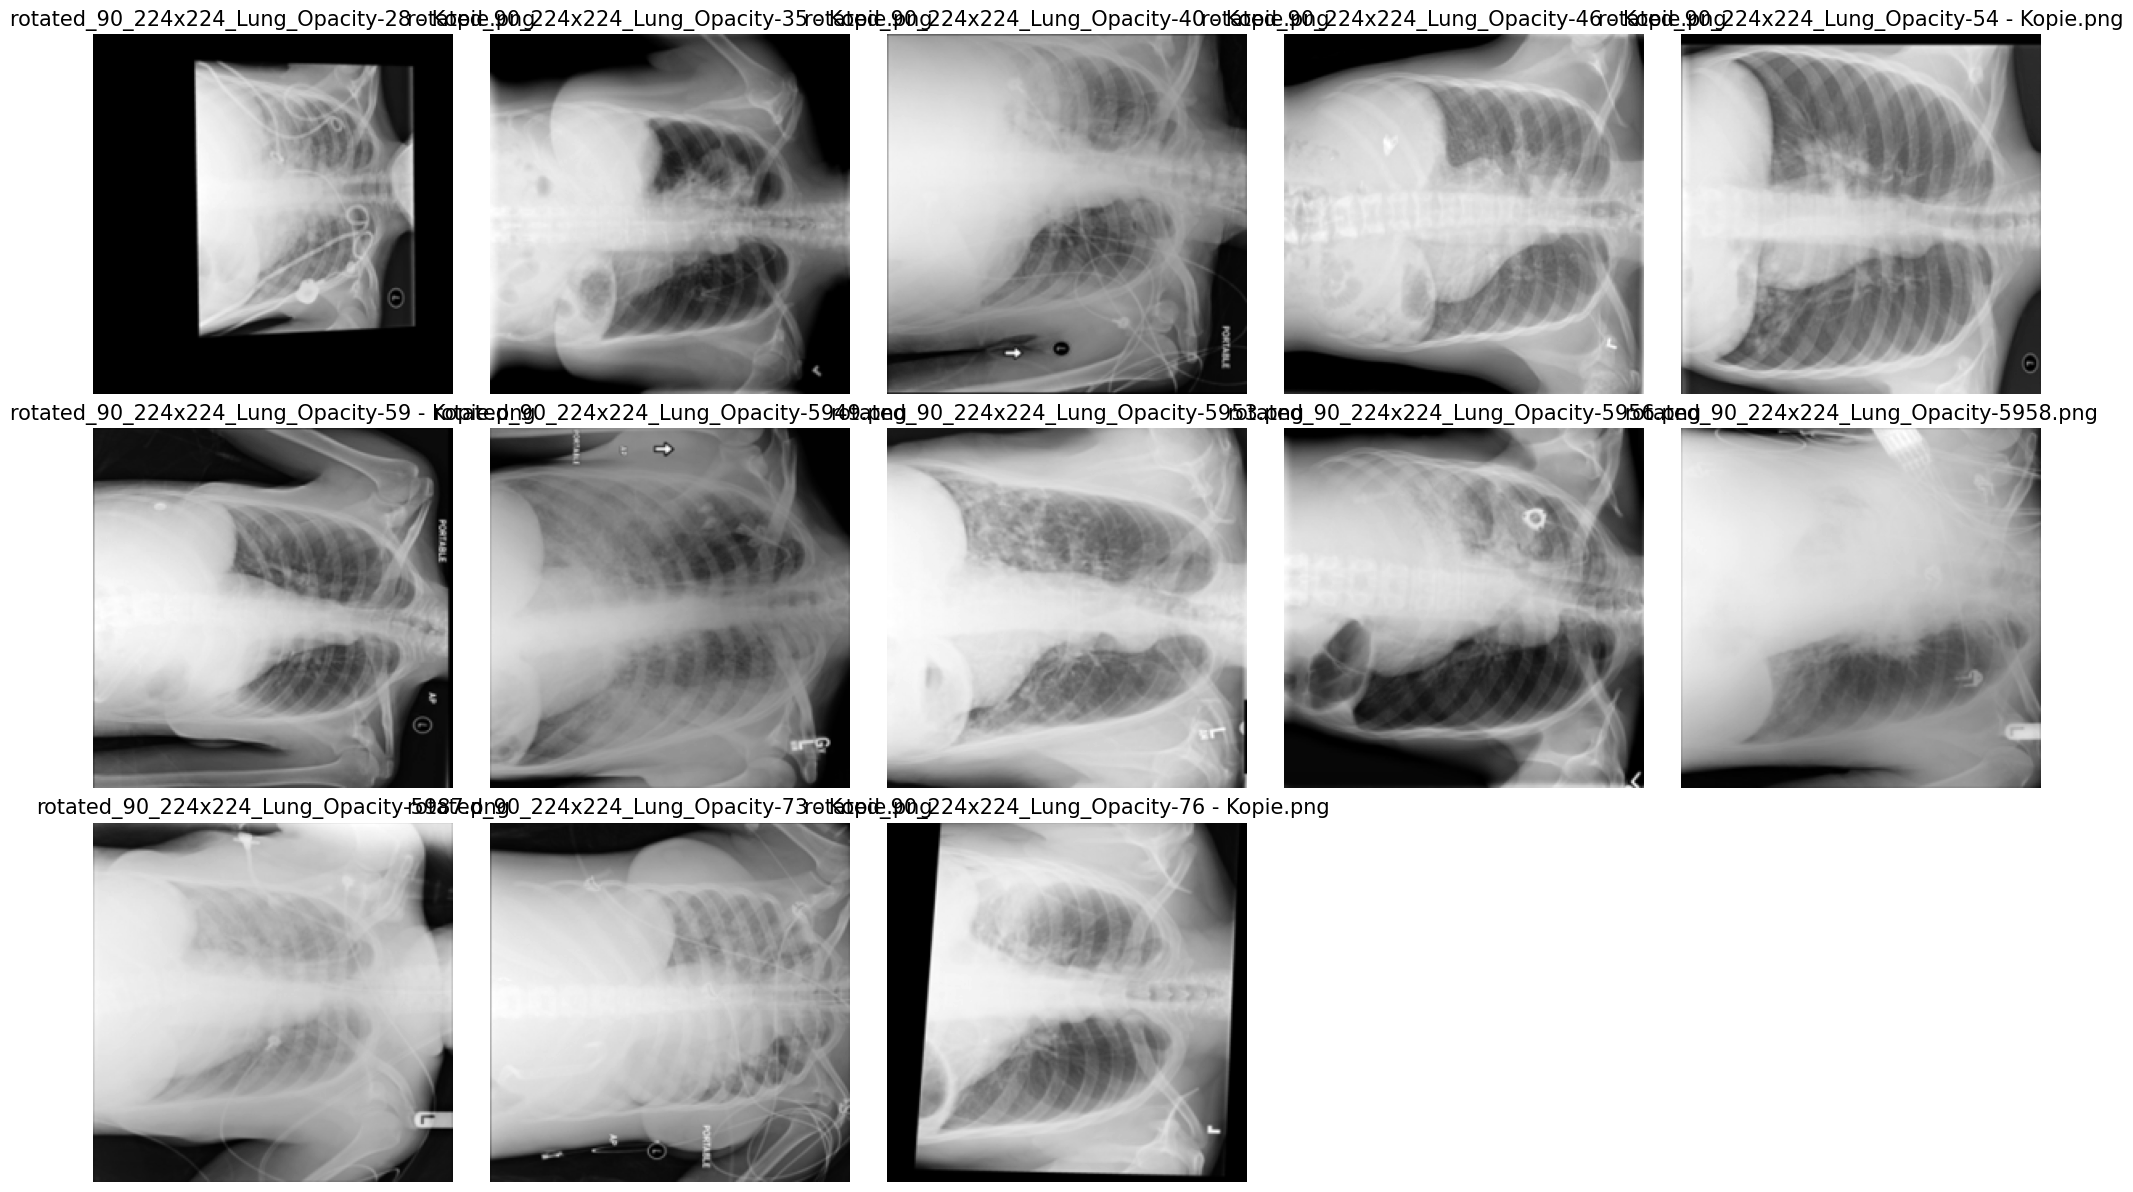


Viral Pneumonia --> estimated orientation: rotated_minus_90 --> total detected: 13


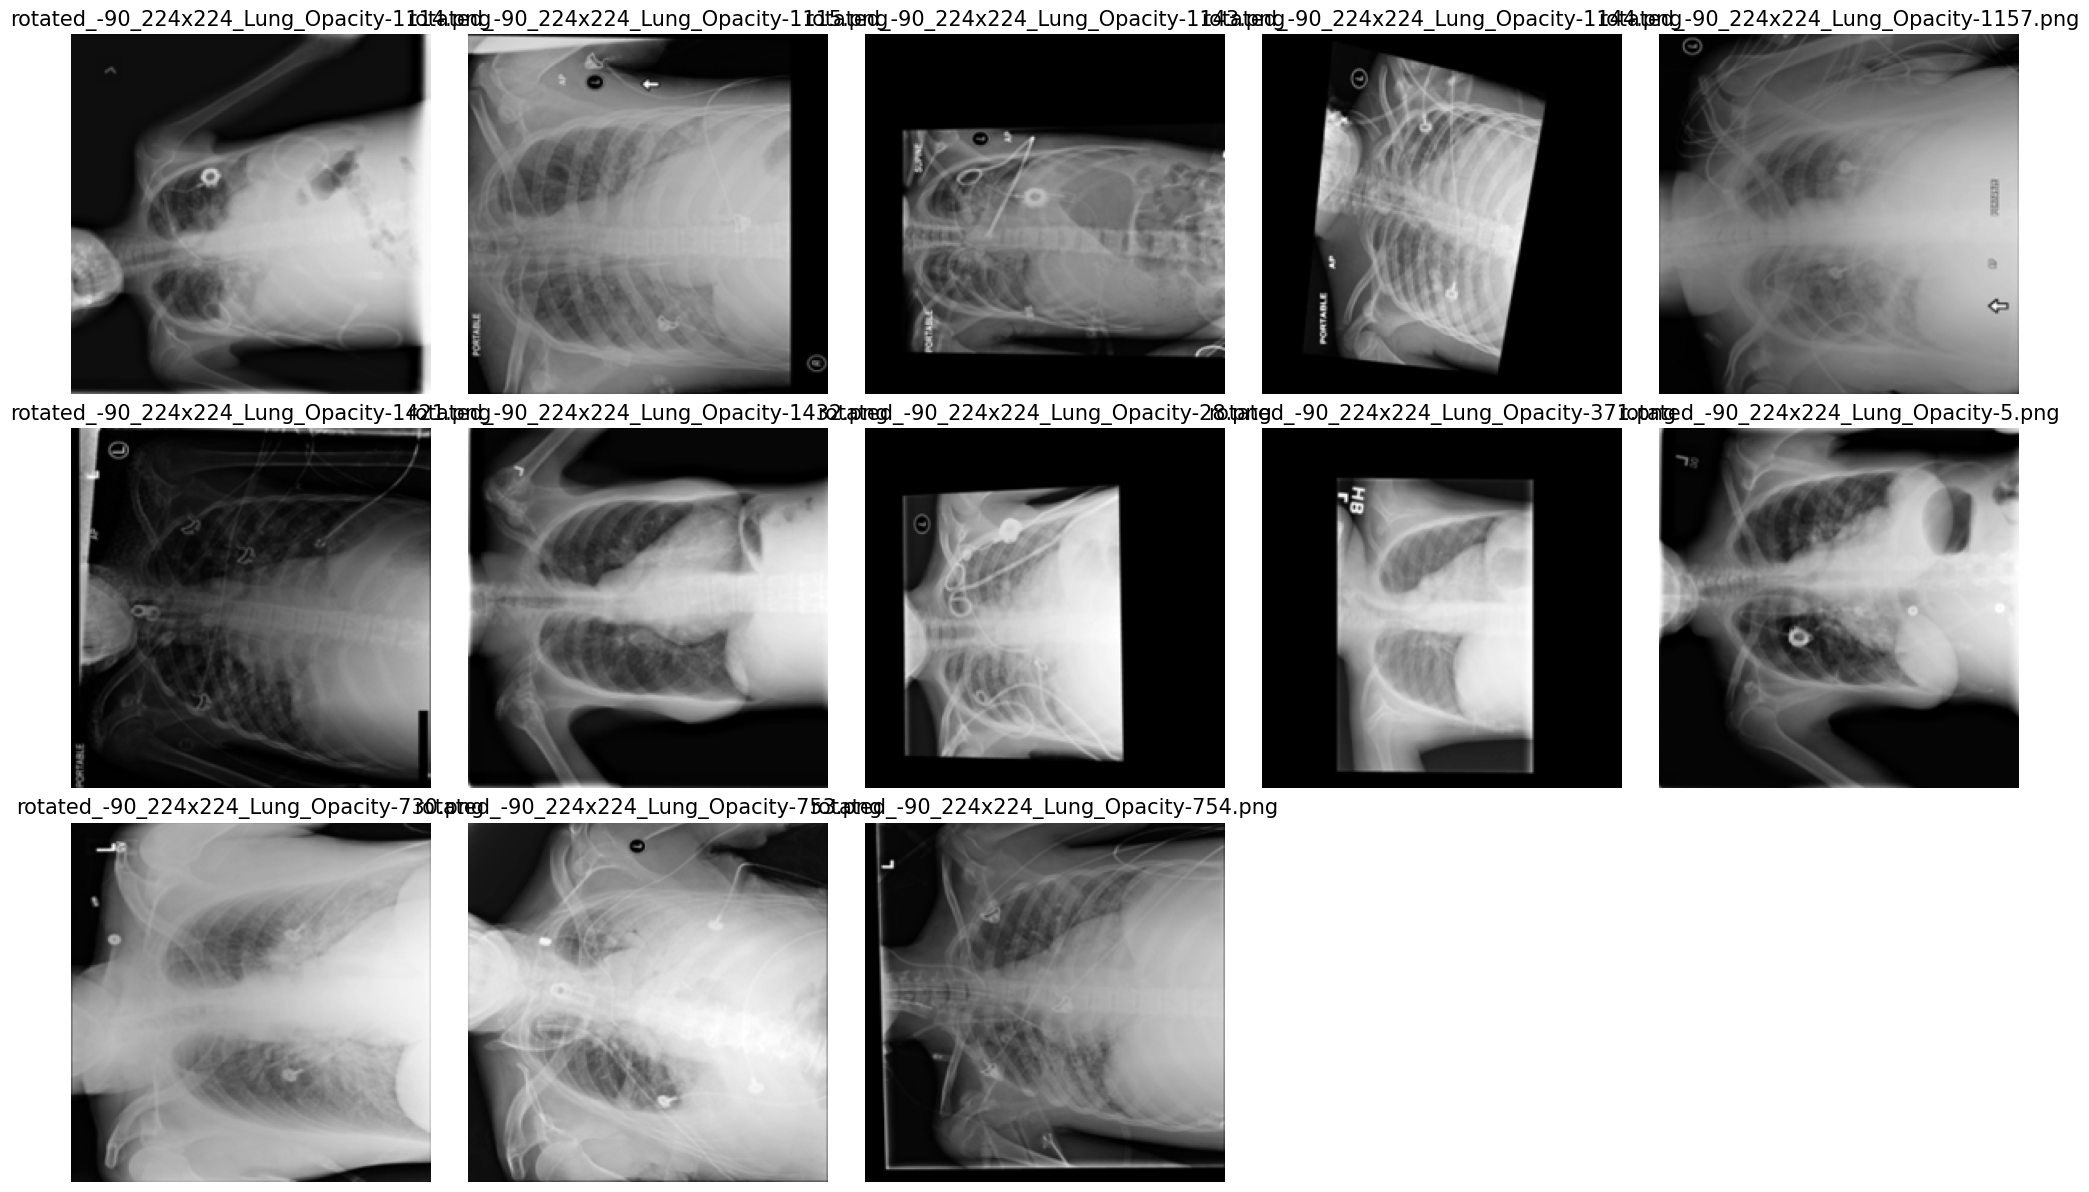


Viral Pneumonia --> estimated orientation: rotated_180 --> total detected: 14


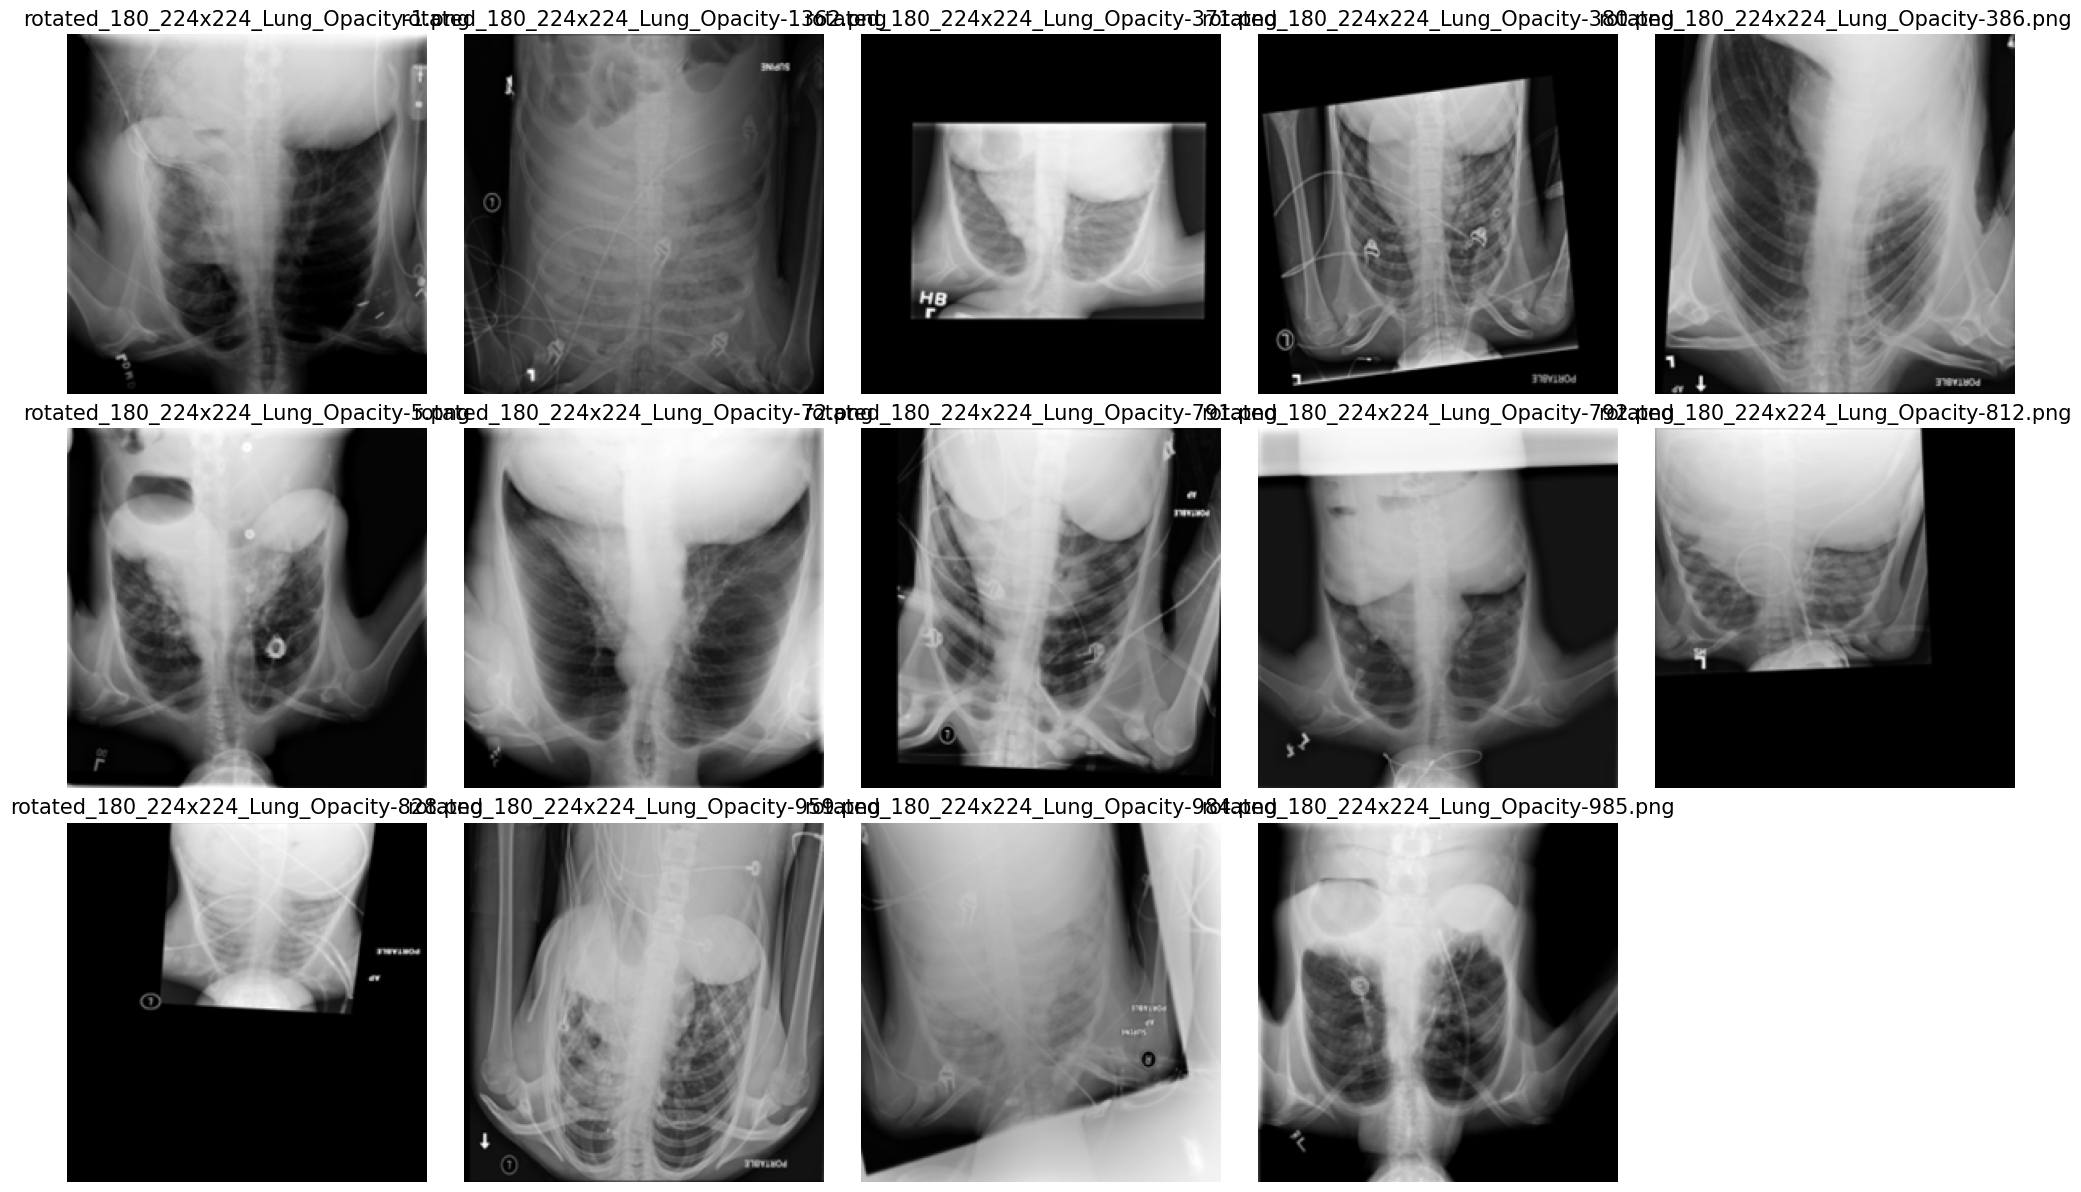

,Image,Orientation,Confidence,Disease
0,224x224_Lung_Opacity-13.png,correct,1.0,test_data
1,224x224_Lung_Opacity-24.png,correct,1.0,test_data
2,224x224_Lung_Opacity-28.png,correct,1.0,test_data
3,224x224_Lung_Opacity-29.png,correct,1.0,test_data
4,224x224_Lung_Opacity-3.png,correct,1.0,test_data
5,224x224_Lung_Opacity-34.png,correct,1.0,test_data
6,224x224_Lung_Opacity-41.png,correct,1.0,test_data
7,224x224_Lung_Opacity-44.png,correct,1.0,test_data
8,224x224_Lung_Opacity-70.png,correct,1.0,test_data
9,224x224_Lung_Opacity-85.png,correct,1.0,test_data


In [34]:
# --> use this scenario to use saved estimate data for further analysis
# load and check estimated data
oer = OrientationEstimatorResnet50(model_name="resnet50_1")
df_estimated = oer.loadEstimatedData(dataset="test", sort_by=["Disease", "Orientation", "Confidence"])
oer.checkEstimatedData(df_estimated)
oer.showRotatedImg(dataset="test")